In [ ]:
from google.colab import drive
drive.mount('/content/drive')


 CATEGORY SUMMARY: TOP 10 MOST POPULAR CATEGORIES


,App,Price,Rating,Installs
Category,,,,
GAME,959,0.30,4.25,13878924415
COMMUNICATION,315,0.26,4.12,11038276251
TOOLS,827,0.32,4.04,8001771915
PRODUCTIVITY,374,0.67,4.18,5793091369
SOCIAL,239,0.07,4.25,5487867902
PHOTOGRAPHY,281,0.42,4.16,4649147655
FAMILY,1832,1.31,4.18,4427941505
VIDEO_PLAYERS,163,0.06,4.04,3926902720
TRAVEL_AND_LOCAL,219,0.23,4.07,2894887146


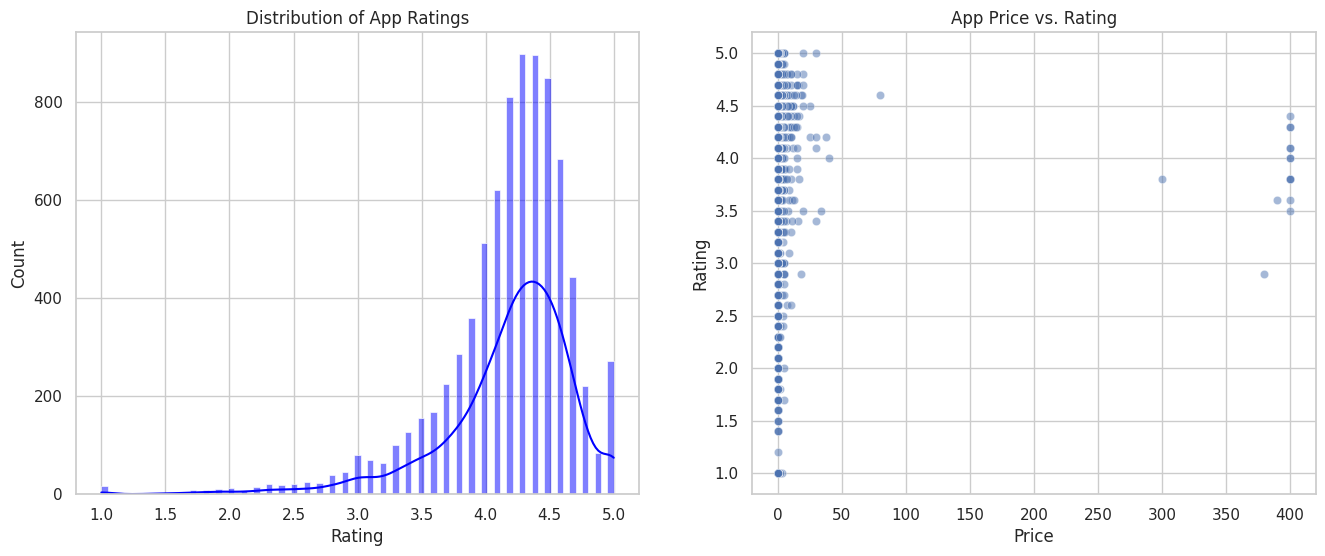

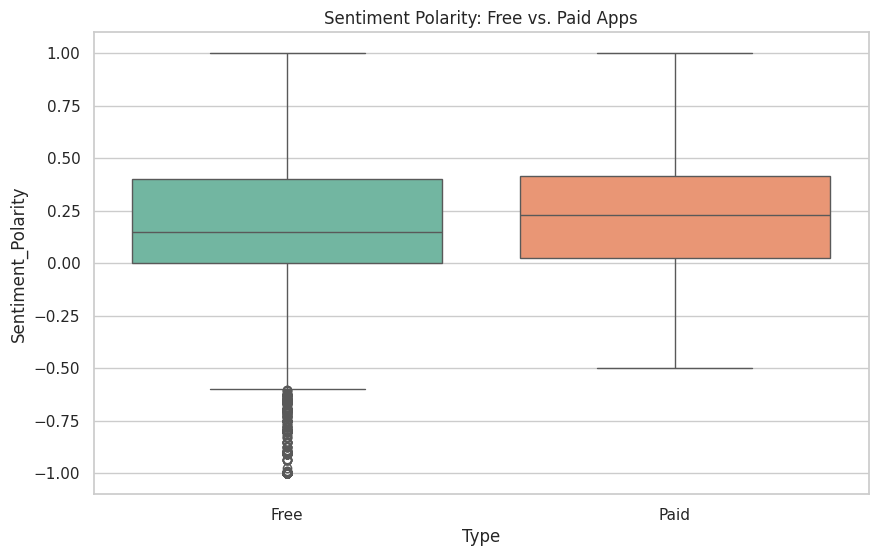


SENTIMENT BY CATEGORY (TOP 5)
Category
COMICS               0.449810
EVENTS               0.377933
AUTO_AND_VEHICLES    0.348683
PARENTING            0.318880
WEATHER              0.294978
Name: Sentiment_Polarity, dtype: float64


In [30]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

apps = pd.read_csv('/content/sample_data/apps.csv')
reviews = pd.read_csv('/content/sample_data/user_reviews.csv')


chars_to_remove = [',', '+', '$']
for char in chars_to_remove:
    apps['Installs'] = apps['Installs'].apply(lambda x: x.replace(char, '') if isinstance(x, str) else x)
    apps['Price'] = apps['Price'].apply(lambda x: x.replace(char, '') if isinstance(x, str) else x)

apps['Installs'] = pd.to_numeric(apps['Installs'])
apps['Price'] = pd.to_numeric(apps['Price'])
apps['Rating'] = pd.to_numeric(apps['Rating'])

print("\n" + "="*60)
print(" CATEGORY SUMMARY: TOP 10 MOST POPULAR CATEGORIES")
print("="*60)
category_info = apps.groupby('Category').agg({'App': 'count', 'Price': 'mean', 'Rating': 'mean', 'Installs': 'sum'})
category_info = category_info.sort_values(by='Installs', ascending=False).head(10).round(2)
display(category_info)

plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
sns.histplot(apps['Rating'], kde=True, color='blue')
plt.title('Distribution of App Ratings')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Price', y='Rating', data=apps, alpha=0.5)
plt.title('App Price vs. Rating')
plt.show()


merged_df = pd.merge(apps, reviews, on='App', how='inner')
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='Set2')
plt.title('Sentiment Polarity: Free vs. Paid Apps')

plt.show()

print("\n" + "="*60)
print("SENTIMENT BY CATEGORY (TOP 5)")
print("="*60)
sentiment_summary = merged_df.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False).head(5)
print(sentiment_summary)
